In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [105]:
#Leer datos
datos=pd.read_csv("FacebookReviews.csv")
datos

,comments/0/likesCount,date,time,FullDate,likesCount,text
0,NaN,01/11/2023,22:09:15,2023-11-01T22:09:15.000Z,8,La app nunca funciona. El servicio al cliente ...
1,NaN,01/12/2023,17:29:45,2023-12-01T17:29:45.000Z,0,"mal servicio a clientes, ideas tontas como sus..."
2,0.0,26/10/2023,23:17:30,2023-10-26T23:17:30.000Z,16,"No arriesgues tu dinero, nula atención al clie..."
3,NaN,31/10/2023,22:50:49,2023-10-31T22:50:49.000Z,11,"HORRIBLE SERVICIO, lo único que hacen es elimi..."
4,NaN,10/11/2023,00:00:39,2023-11-10T00:00:39.000Z,15,Lo recomendaba y hasta lo defendía pero ya no…...
...,...,...,...,...,...,...
240,NaN,11/11/2023,18:39:13,2023-11-11T18:39:13.000Z,7,Mañana les cancelo las cuentas que tengo con u...
241,NaN,14/11/2023,21:11:53,2023-11-14T21:11:53.000Z,10,escupieron a los clientes en su cara
242,NaN,08/11/2023,21:25:44,2023-11-08T21:25:44.000Z,6,"buuuuuuu, qué malas promociones la verdad. Ban..."
243,NaN,26/10/2023,03:58:06,2023-10-26T03:58:06.000Z,8,"patético ahora, la verdad"


In [122]:
#Convertir fechas a dias de semana
from datetime import datetime

datos_c = datos.copy()

for i in range(len(datos_c)):

  fecha =  datos_c.iloc[i]["date"]

  fecha_objeto = datetime.strptime(fecha, '%d/%m/%Y')

  dia_semana = fecha_objeto.strftime('%A')
  datos_c.at[i,"Dia_Semana"]=dia_semana

  semana = fecha_objeto.strftime('%U')
  if fecha_objeto.year == 2024:
    semana = int(int(semana) + 52)
  datos_c.at[i, "Semana_Año"] = int(semana)


In [123]:
datos_c

,comments/0/likesCount,date,time,FullDate,likesCount,text,Dia_Semana,Semana_Año
0,NaN,01/11/2023,22:09:15,2023-11-01T22:09:15.000Z,8,La app nunca funciona. El servicio al cliente ...,Wednesday,44.0
1,NaN,01/12/2023,17:29:45,2023-12-01T17:29:45.000Z,0,"mal servicio a clientes, ideas tontas como sus...",Friday,48.0
2,0.0,26/10/2023,23:17:30,2023-10-26T23:17:30.000Z,16,"No arriesgues tu dinero, nula atención al clie...",Thursday,43.0
3,NaN,31/10/2023,22:50:49,2023-10-31T22:50:49.000Z,11,"HORRIBLE SERVICIO, lo único que hacen es elimi...",Tuesday,44.0
4,NaN,10/11/2023,00:00:39,2023-11-10T00:00:39.000Z,15,Lo recomendaba y hasta lo defendía pero ya no…...,Friday,45.0
...,...,...,...,...,...,...,...,...
240,NaN,11/11/2023,18:39:13,2023-11-11T18:39:13.000Z,7,Mañana les cancelo las cuentas que tengo con u...,Saturday,45.0
241,NaN,14/11/2023,21:11:53,2023-11-14T21:11:53.000Z,10,escupieron a los clientes en su cara,Tuesday,46.0
242,NaN,08/11/2023,21:25:44,2023-11-08T21:25:44.000Z,6,"buuuuuuu, qué malas promociones la verdad. Ban...",Wednesday,45.0
243,NaN,26/10/2023,03:58:06,2023-10-26T03:58:06.000Z,8,"patético ahora, la verdad",Thursday,43.0


In [124]:
datos_L=datos_c.dropna(subset=["time"])
datos_L = datos_L.copy()
datos_L = datos_L.reset_index(drop=True)

horas=["01:00:00","02:00:00","03:00:00","04:00:00","05:00:00","06:00:00","07:00:00","08:00:00",
       "09:00:00","10:00:00","11:00:00","12:00:00","13:00:00","14:00:00","15:00:00","16:00:00",
       "17:00:00","18:00:00","19:00:00","20:00:00","21:00:00","22:00:00","23:00:00"]

for i in range(len(datos_L)):
  horita=datos_L.at[i,"time"]
  for j in range(len(horas)):
    if(horita<horas[j]):
      datos_L.at[i,"Grupo_Hora"]=j+1
      break
    elif(horita>horas[j] and j==22):
      datos_L.at[i,"Grupo_Hora"]=24

datos_L

,comments/0/likesCount,date,time,FullDate,likesCount,text,Dia_Semana,Semana_Año,Grupo_Hora
0,NaN,01/11/2023,22:09:15,2023-11-01T22:09:15.000Z,8,La app nunca funciona. El servicio al cliente ...,Wednesday,44.0,23.0
1,NaN,01/12/2023,17:29:45,2023-12-01T17:29:45.000Z,0,"mal servicio a clientes, ideas tontas como sus...",Friday,48.0,18.0
2,0.0,26/10/2023,23:17:30,2023-10-26T23:17:30.000Z,16,"No arriesgues tu dinero, nula atención al clie...",Thursday,43.0,24.0
3,NaN,31/10/2023,22:50:49,2023-10-31T22:50:49.000Z,11,"HORRIBLE SERVICIO, lo único que hacen es elimi...",Tuesday,44.0,23.0
4,NaN,10/11/2023,00:00:39,2023-11-10T00:00:39.000Z,15,Lo recomendaba y hasta lo defendía pero ya no…...,Friday,45.0,1.0
...,...,...,...,...,...,...,...,...,...
240,NaN,11/11/2023,18:39:13,2023-11-11T18:39:13.000Z,7,Mañana les cancelo las cuentas que tengo con u...,Saturday,45.0,19.0
241,NaN,14/11/2023,21:11:53,2023-11-14T21:11:53.000Z,10,escupieron a los clientes en su cara,Tuesday,46.0,22.0
242,NaN,08/11/2023,21:25:44,2023-11-08T21:25:44.000Z,6,"buuuuuuu, qué malas promociones la verdad. Ban...",Wednesday,45.0,22.0
243,NaN,26/10/2023,03:58:06,2023-10-26T03:58:06.000Z,8,"patético ahora, la verdad",Thursday,43.0,4.0


In [125]:
quitados=len(datos)-len(datos_L)
valores_hora = datos_L["Grupo_Hora"].to_numpy()
valores_unicos, counts = np.unique(valores_hora, return_counts=True)
porcentaje = {valor: count / len(valores_hora) for valor, count in zip(valores_unicos, counts)}

valores = list(porcentaje.keys())
probabilidades = list(porcentaje.values())

VI = np.random.choice(valores, p=probabilidades,size=quitados)
VI

array([], dtype=float64)

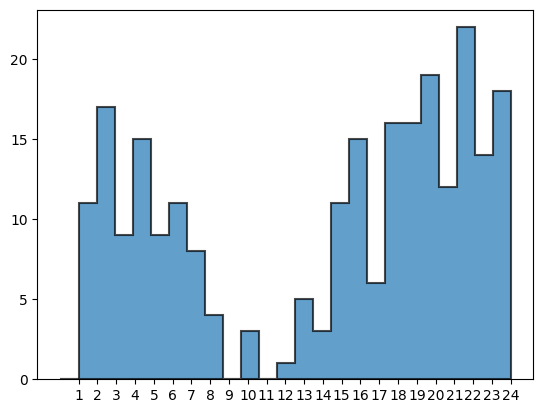

In [126]:
escala= np.arange(1,25,1);
plt.hist(datos_L["Grupo_Hora"],bins=24,edgecolor='black', alpha=0.7, linewidth=1.5, histtype='stepfilled')
plt.hist(VI,bins=24,edgecolor='black', alpha=0.7, linewidth=1.5, histtype='stepfilled')
plt.xticks(escala);
plt.show()

In [127]:
GH2 = datos_L["Grupo_Hora"].to_numpy()
GHT = np.concatenate((VI, GH2))
print(len(GHT))
datos_c["Grupo_Hora"]=GHT

datos_c

245


,comments/0/likesCount,date,time,FullDate,likesCount,text,Dia_Semana,Semana_Año,Grupo_Hora
0,NaN,01/11/2023,22:09:15,2023-11-01T22:09:15.000Z,8,La app nunca funciona. El servicio al cliente ...,Wednesday,44.0,23.0
1,NaN,01/12/2023,17:29:45,2023-12-01T17:29:45.000Z,0,"mal servicio a clientes, ideas tontas como sus...",Friday,48.0,18.0
2,0.0,26/10/2023,23:17:30,2023-10-26T23:17:30.000Z,16,"No arriesgues tu dinero, nula atención al clie...",Thursday,43.0,24.0
3,NaN,31/10/2023,22:50:49,2023-10-31T22:50:49.000Z,11,"HORRIBLE SERVICIO, lo único que hacen es elimi...",Tuesday,44.0,23.0
4,NaN,10/11/2023,00:00:39,2023-11-10T00:00:39.000Z,15,Lo recomendaba y hasta lo defendía pero ya no…...,Friday,45.0,1.0
...,...,...,...,...,...,...,...,...,...
240,NaN,11/11/2023,18:39:13,2023-11-11T18:39:13.000Z,7,Mañana les cancelo las cuentas que tengo con u...,Saturday,45.0,19.0
241,NaN,14/11/2023,21:11:53,2023-11-14T21:11:53.000Z,10,escupieron a los clientes en su cara,Tuesday,46.0,22.0
242,NaN,08/11/2023,21:25:44,2023-11-08T21:25:44.000Z,6,"buuuuuuu, qué malas promociones la verdad. Ban...",Wednesday,45.0,22.0
243,NaN,26/10/2023,03:58:06,2023-10-26T03:58:06.000Z,8,"patético ahora, la verdad",Thursday,43.0,4.0


In [128]:
mapa_dias ={
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

datos_c['Dia_Semana'] = datos_c['Dia_Semana'].replace(mapa_dias)

In [129]:
Matriz_Actividad = np.zeros((7,24))

for i in range(len(datos_c)):
  fila=int((datos_c.iloc[i]["Dia_Semana"])-1)
  columna=int((datos_c.iloc[i]["Grupo_Hora"])-1)
  Matriz_Actividad[fila][columna]=(Matriz_Actividad[fila][columna])+1

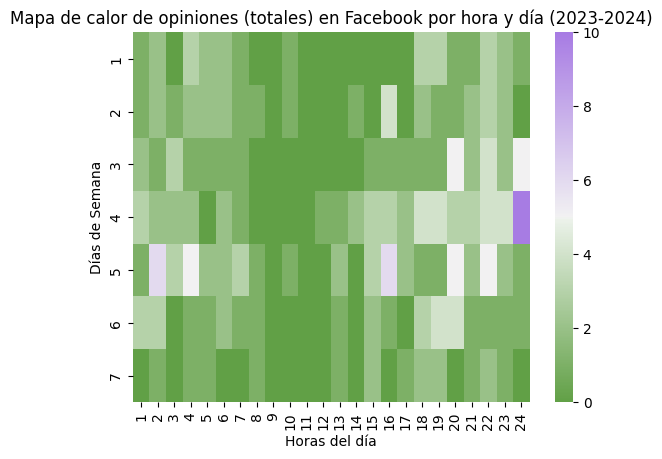

In [139]:

cmap = sns.diverging_palette(120, 280, s=75, l=60, n=9, as_cmap=True)
sns.heatmap(Matriz_Actividad, cmap=cmap)

x=range(1,25,1)
y=range(1,8,1)
plt.gca().set_xticklabels(x)
plt.gca().set_yticklabels(y)
plt.xlabel("Horas del día")
plt.ylabel("Días de Semana")
plt.title("Mapa de calor de opiniones (totales) en Facebook por hora y día (2023-2024)")
plt.show()

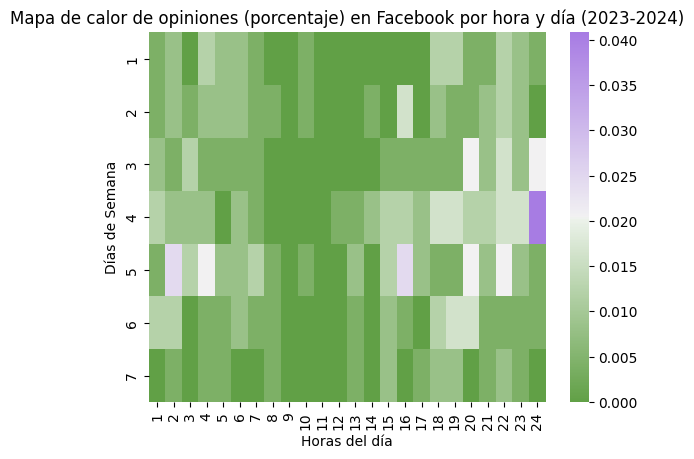

In [140]:
matriz_actividad_porcentaje = np.array(Matriz_Actividad)
suma_total = np.sum(matriz_actividad_porcentaje)
matriz_actividad_porcentaje=matriz_actividad_porcentaje/suma_total

cmap = sns.diverging_palette(120, 280, s=75, l=60, n=9, as_cmap=True)
sns.heatmap(matriz_actividad_porcentaje,cmap=cmap)
x=range(1,25,1)
y=range(1,8,1)
plt.gca().set_xticklabels(x)
plt.gca().set_yticklabels(y)
plt.xlabel("Horas del día")
plt.ylabel("Días de Semana")
plt.title("Mapa de calor de opiniones (porcentaje) en Facebook por hora y día (2023-2024)")
plt.show()

In [141]:
import plotly.express as px

x = np.tile(np.arange(1, 25), 7)
y = np.repeat(np.arange(1, 8), 24)
z = Matriz_Actividad.flatten()

fig = px.scatter_3d(x=x, y=y, z=z,color=z)
fig.show()

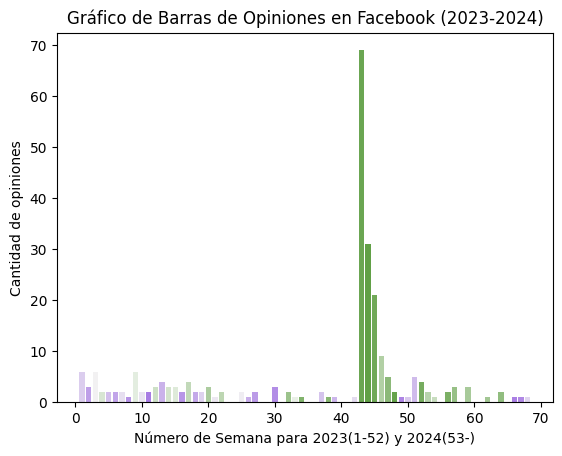

In [144]:
from collections import Counter

valores_semanas = datos_c["Semana_Año"].to_numpy()
conteo = Counter(valores_semanas)

claves = list(conteo.keys())
valores_conteo = list(conteo.values())

paleta = sns.diverging_palette(120, 280, s=75, l=60, n=len(claves))
colores = paleta.as_hex()


plt.bar(claves, valores_conteo,color=colores)

# Agregar etiquetas y título
plt.xlabel('Número de Semana para 2023(1-52) y 2024(53-)')
plt.ylabel('Cantidad de opiniones')
plt.title('Gráfico de Barras de Opiniones en Facebook (2023-2024)')

# Mostrar el gráfico
plt.show()